<a href="https://colab.research.google.com/github/oprostep/2024-Spring-ML/blob/main/%EC%8A%A4%EB%A7%88%ED%8A%B8%ED%8F%B0_%EB%AA%A8%EB%8D%B8%EB%B3%84_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [524]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

pd.set_option("display.max_rows" ,100)
pd.set_option("display.max_columns" ,100)
sns.set_style("whitegrid")

In [525]:
targetUrl = "https://raw.githubusercontent.com/oprostep/2024-Spring-ML/main/smartphones.csv"

# Parsing
df = pd.read_csv(targetUrl, sep=',')
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB




o-there are missing data in ["RAM" , "Storage"]

In [527]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
RAM,1333.0,5.961,2.668,1.00,4.00,6.00,8.000,12.00
Storage,1791.0,162.652,139.412,2.00,64.00,128.00,256.000,1000.00
Final Price,1816.0,492.176,398.606,60.46,200.99,349.99,652.718,2271.28


# Data Cleaning

In [528]:
df.RAM.unique()

array([ 8.,  4.,  6., 12., nan,  3.,  2.,  1.])

In [529]:
df.Storage.unique()

array([ 256.,  128.,  512.,   64.,   32.,   16.,    2.,   nan, 1000.,
          4.,   12.,    3.,    8.])

In [530]:
df.drop("Smartphone" ,axis =1 , inplace =True)

In [531]:
df[df.duplicated()]

,Brand,Model,RAM,Storage,Color,Free,Final Price
58,Xiaomi,Redmi A1,2.0,32.0,Black,Yes,109.00
234,Motorola,Edge 40,8.0,256.0,Gold,Yes,491.64
348,Motorola,Razr 40,8.0,256.0,Gold,Yes,899.01
465,Samsung,Galaxy S21,8.0,256.0,Gray,Yes,649.00
562,Samsung,Galaxy S20,6.0,128.0,Blue,Yes,649.00
699,Samsung,Galaxy A14,4.0,128.0,Black,Yes,209.00
790,Apple,iPhone SE,NaN,64.0,Black,Yes,439.00
812,Samsung,Galaxy Z Fold4,12.0,256.0,Green,Yes,1799.00
847,Cubot,X70,12.0,256.0,Black,Yes,249.95
1005,Realme,7,8.0,128.0,Blue,Yes,239.00


In [532]:
df.drop_duplicates(inplace= True)

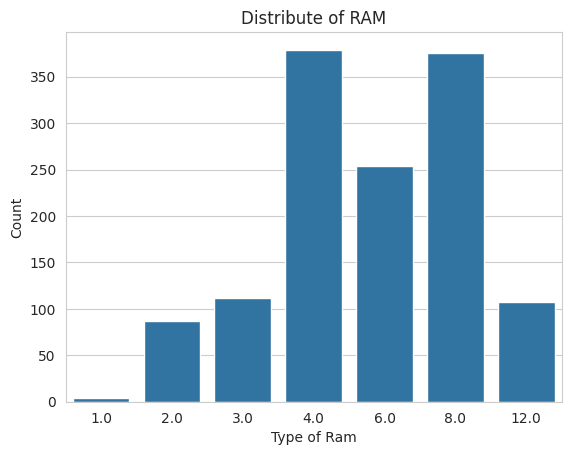

In [533]:
plt.title("Distribute of RAM")
sns.countplot(data = df ,x="RAM")
plt.xlabel("Type of Ram")
plt.ylabel("Count")
plt.show()

In [534]:
pd.DataFrame(df.RAM.value_counts())

,count
RAM,
4.0,379
8.0,375
6.0,254
3.0,112
12.0,107
2.0,87
1.0,4


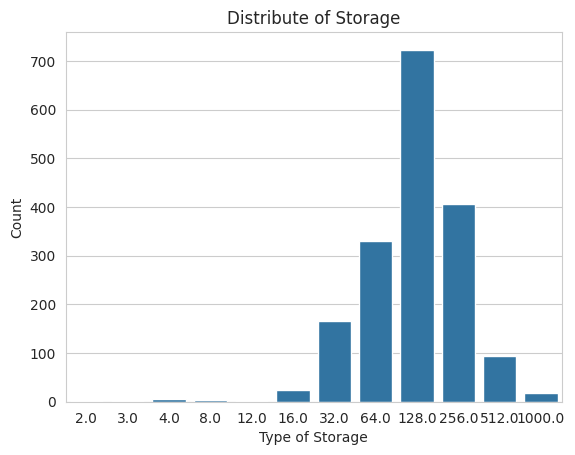

In [535]:
plt.title("Distribute of Storage")
sns.countplot(data = df ,x="Storage")
plt.xlabel("Type of Storage")
plt.ylabel("Count")
plt.show()

In [536]:
pd.DataFrame(df.Storage.value_counts())

,count
Storage,
128.0,723
256.0,407
64.0,331
32.0,165
512.0,94
16.0,24
1000.0,17
4.0,6
8.0,3


In [537]:
ram_mode = df.RAM.mode()
storge_mode = df.Storage.mode()
print("the mode of RAM is : ",ram_mode[0])
print("the mode of Storage is : ",storge_mode[0])

the mode of RAM is :  4.0
the mode of Storage is :  128.0


In [538]:
df.RAM.fillna(ram_mode[0],inplace=True)
df.Storage.fillna(storge_mode[0],inplace=True)

df.isna().sum()

Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 0 to 1815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1800 non-null   object 
 1   Model        1800 non-null   object 
 2   RAM          1800 non-null   float64
 3   Storage      1800 non-null   float64
 4   Color        1800 non-null   object 
 5   Free         1800 non-null   object 
 6   Final Price  1800 non-null   float64
dtypes: float64(3), object(4)
memory usage: 112.5+ KB


In [540]:
#df.RAM = df.RAM.astype("category")
#df.Storage = df.Storage.astype("category")

In [541]:
df.describe(include="O").T

,count,unique,top,freq
Brand,1800,37,Samsung,450
Model,1800,383,iPhone 13,60
Color,1800,17,Black,532
Free,1800,2,Yes,1756


In [542]:
df[['RAM', 'Storage', 'Final Price']].corr().style.background_gradient(axis=None, vmin=0.5, vmax=1, cmap="RdBu")

,RAM,Storage,Final Price
RAM,1.000000,0.263126,0.241399
Storage,0.263126,1.000000,0.698752
Final Price,0.241399,0.698752,1.000000


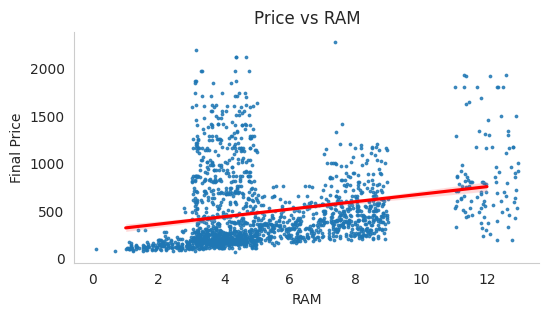

In [543]:
fig = plt.figure(figsize = (6,3))
g = sns.regplot(x = df.RAM, y = df['Final Price'], x_jitter = True, line_kws={"color": "red"}, scatter_kws={'s':3})
plt.title('Price vs RAM')
g.grid(False)
sns.despine()
plt.show()

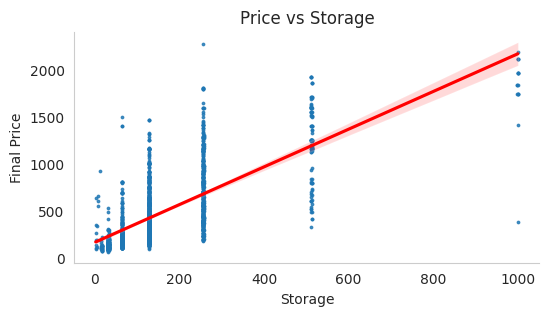

In [544]:
fig = plt.figure(figsize = (6,3))
g = sns.regplot(x = df.Storage, y = df['Final Price'], x_jitter = True, line_kws={"color": "red"}, scatter_kws={'s':3})
plt.title('Price vs Storage')
g.grid(False)
sns.despine()
plt.show()

# 1. 가장 인기 많은 브랜드

In [545]:
df.Brand.value_counts()[0:5]

Brand
Samsung    450
Xiaomi     348
Apple      291
Realme     116
OPPO        92
Name: count, dtype: int64

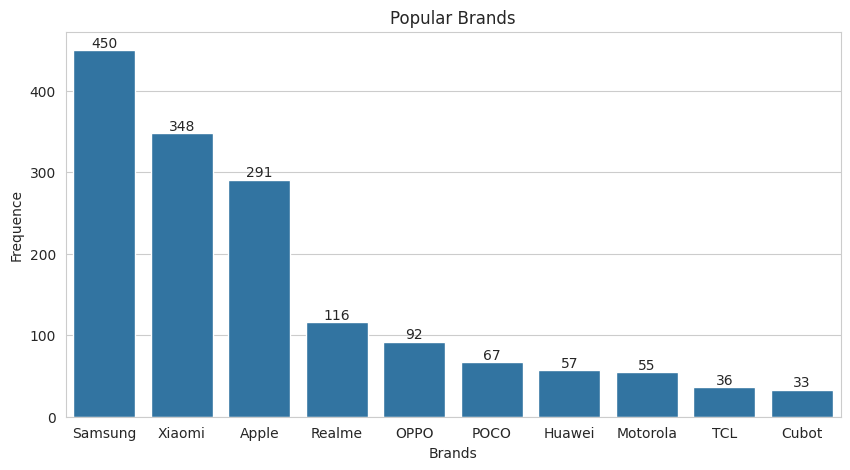

In [546]:
plt.figure(figsize=(10,5))
plt.title("Popular Brands")
figure = sns.barplot(x=df.Brand.value_counts()[0:10].index ,y= df.Brand.value_counts()[0:10].values)
for cotain in figure.containers :
    figure.bar_label(cotain)
plt.xlabel("Brands")
plt.ylabel("Frequence")
plt.show()

# 2. 브랜드별 평균 가격

In [547]:
df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[:5]

Brand
Apple      843.783
Lenovo     757.180
Asus       751.573
Nothing    657.749
Samsung    637.477
Name: Final Price, dtype: float64

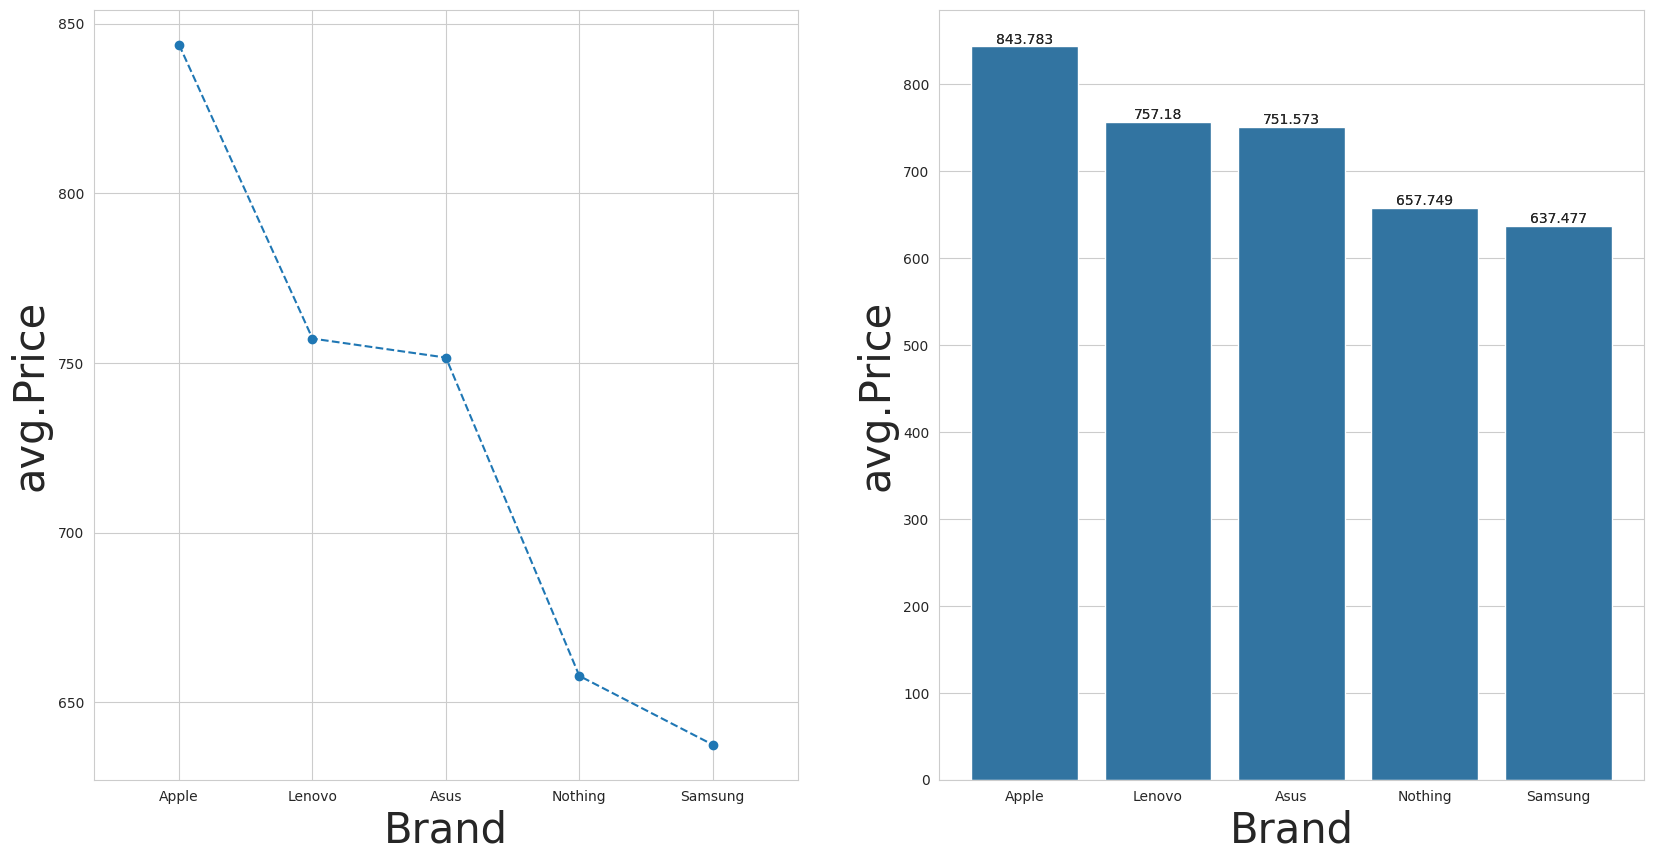

In [548]:

fig ,ax =plt.subplots(nrows=1 ,ncols= 2 ,sharex=True, figsize=(20,10) )
fig.set_label("avg.Price of Brand")

#ax[0]
figure = sns.barplot(x =df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[0:5].index ,
            y=df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[0:5].values ,
                    ax= ax[1])


for cotain in figure.containers :
    figure.bar_label(cotain)
ax[0].set_ylabel("avg.Price",fontsize=30)
ax[0].set_xlabel("Brand",fontsize=30)
#ax[1]
ax[0].plot(df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[0:5].index ,
            df.groupby("Brand")["Final Price"].mean().sort_values(ascending=False).round(3)[0:5].values ,
                     "o--")


for cotain in figure.containers :
    figure.bar_label(cotain)
ax[1].set_ylabel("avg.Price",fontsize=30)
ax[1].set_xlabel("Brand",fontsize=30)
plt.show()

# 3. RAM과 가격의 상관관계

In [549]:
from scipy.stats import f_oneway

cleaned_df = df.dropna(subset=['RAM', 'Final Price'])

storage_categories = cleaned_df['RAM'].unique()
price_arrays = [cleaned_df[cleaned_df['RAM'] == category]['Final Price'] for category in storage_categories]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*price_arrays)

print("F 검정:", f_statistic)
print("P 계수:", p_value)


F 검정: 60.78698296894907
P 계수: 9.418992475326952e-69



F 검정과 P계수로부터 유의미한 상관관계가 있다고 볼 수 있다.

# 4. 용량과 가격의 상관관계

In [550]:
from scipy.stats import f_oneway

cleaned_df = df.dropna(subset=['Storage', 'Final Price'])

storage_categories = cleaned_df['Storage'].unique()
price_arrays = [cleaned_df[cleaned_df['Storage'] == category]['Final Price'] for category in storage_categories]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*price_arrays)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 169.25659668385651
P-value: 1.5862574275852624e-267


F 검정과 P계수로부터 유의미한 상관관계가 있다고 볼 수 있다.

# 5. 통신사 약정이 스마트폰 가격에 영향을 미치는가?

In [551]:
df.Free.value_counts()

Free
Yes    1756
No       44
Name: count, dtype: int64

In [552]:
from scipy.stats import ttest_ind


# Let's first filter out any missing values
cleaned_df = df.dropna(subset=['Free', 'Final Price'])

# Separate prices for smartphones with and without contracts
price_with_contract = cleaned_df[cleaned_df['Free'] == 'Yes']['Final Price']
price_without_contract = cleaned_df[cleaned_df['Free'] == 'No']['Final Price']

# Perform independent t-test
t_statistic, p_value = ttest_ind(price_with_contract, price_without_contract)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.916963767672127
P-value: 0.055400867917226274


유의미한 상관관계가 없다고 볼 수 있다!

# 모델 구성

In [553]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [554]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1)
lasso_reg = Lasso(alpha=0.1)
tree_reg = DecisionTreeRegressor(random_state=1)
forest_reg = RandomForestRegressor(n_estimators=100,random_state=1)

In [555]:
brand_freq = df['Brand'].value_counts(normalize=True).to_dict()
df['brand_freq'] = df['Brand'].map(brand_freq)

In [556]:
df.drop(columns=['Brand'] , inplace= True)

In [557]:
color_freq = df['Color'].value_counts(normalize=True).to_dict()
df['color_freq'] = df['Color'].map(color_freq)
df.drop(columns=['Color'] , inplace= True)

In [558]:
model_freq = df['Model'].value_counts(normalize=True).to_dict()
df['model_freq'] = df['Model'].map(model_freq)
df.drop(columns=['Model'] , inplace= True)

In [559]:
model_freq = df['Free'].value_counts(normalize=True).to_dict()
df['Free_freq'] = df['Free'].map(model_freq)
df.drop(columns=['Free'] , inplace= True)

In [560]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df.RAM = df.RAM.astype("float")
df.Storage = df.Storage.astype("float")
numerical_columns = ['RAM' , 'Storage']
df[numerical_columns] = sc.fit_transform(df[numerical_columns])

최종 학습 데이터셋 구성

In [561]:
X = df.drop('Final Price', axis=1)
y = df['Final Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [562]:
lr_reg.fit(X_train ,y_train)
y_pred = lr_reg.predict(X_test)
y_prdict_train = lr_reg.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.6410
R2 Score for test: 0.6483


In [563]:
ridge_reg.fit(X_train ,y_train)
y_pred = ridge_reg.predict(X_test)
y_prdict_train =ridge_reg.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.6005
R2 Score for test: 0.6184


In [564]:
lasso_reg.fit(X_train ,y_train)
y_pred = lasso_reg.predict(X_test)
y_prdict_train = lasso_reg.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.6401
R2 Score for test: 0.6477


In [565]:
tree_reg.fit(X_train ,y_train)
y_pred = tree_reg.predict(X_test)
y_prdict_train =tree_reg.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.9552
R2 Score for test: 0.7403


In [566]:
forest_reg.fit(X_train ,y_train)
y_pred = forest_reg.predict(X_test)
y_prdict_train = forest_reg.predict(X_train)
r2_train = r2_score(y_train, y_prdict_train)

r2_test = r2_score(y_test, y_pred)
print(f'R2 Score for train: {r2_train:.4f}')
print(f'R2 Score for test: {r2_test:.4f}')

R2 Score for train: 0.9379
R2 Score for test: 0.8167
